# Лабораторна робота №2
### Студентки групи МІТ-31 (підгрупа 1)
### Борук Дарини Ігорівни

#### Part1

          Feature1     Feature2     Feature3     Feature4     Feature5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.005830    -0.032861     0.023278     0.022745     0.001909   
std       0.995867     0.969661     1.023834     1.040173     1.000525   
min      -3.178436    -3.716564    -3.314510    -3.231794    -3.256337   
25%      -0.693505    -0.690723    -0.649925    -0.700223    -0.715539   
50%      -0.016662    -0.022279     0.035093     0.056085     0.033810   
75%       0.729871     0.602187     0.730238     0.712440     0.694807   
max       2.887298     2.632390     3.736254     3.038801     2.878940   

          Feature6       Target  
count  1000.000000  1000.000000  
mean      0.008044     2.535749  
std       1.010300   100.436757  
min      -2.931506  -335.348944  
25%      -0.683966   -66.791437  
50%       0.054391     3.457208  
75%       0.667757    74.071929  
max       2.791509   330.915390  

Model Regression: MSE = 19

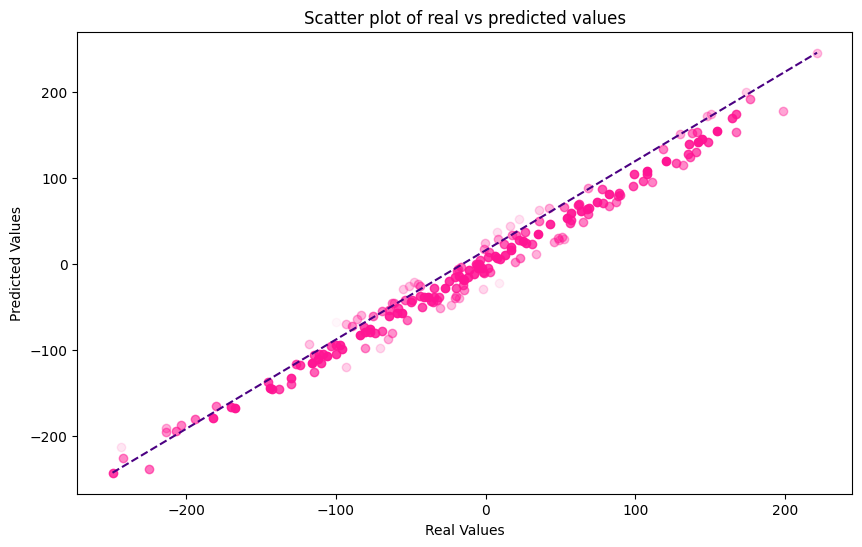

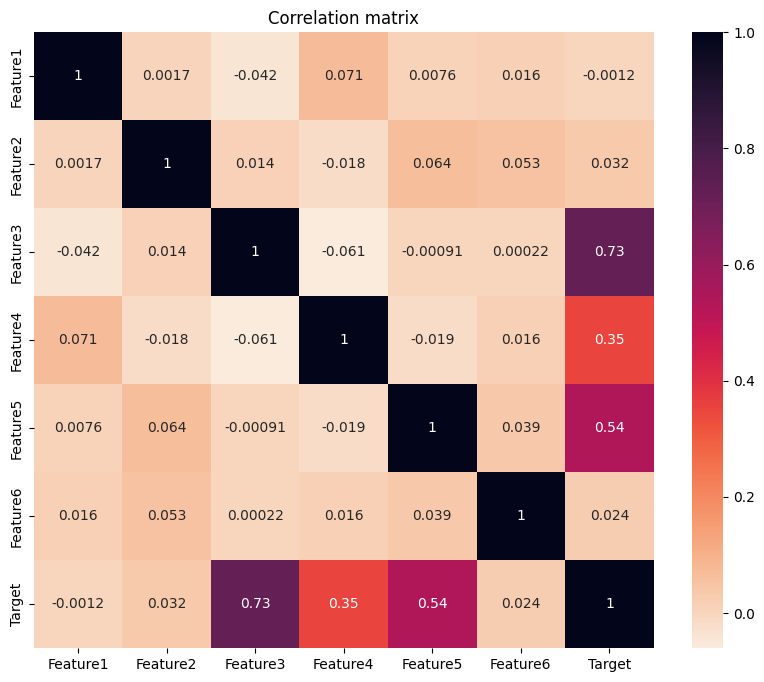

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

num_features = 6
X, y = make_regression(n_samples=1000, n_features=num_features, n_informative=3, noise=13, random_state=33)

data = pd.DataFrame(X, columns = [f"Feature{i+1}" for i in range(num_features)])
data['Target'] = y

data.to_csv('data_make_regression.csv', index=False)

print(data.describe())


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)


from sklearn.linear_model import LinearRegression
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)
y_pred_model_reg = model_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
def evaluate_model(model, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2
mse_model_reg, r2_model_reg = evaluate_model(model_reg, y_test, y_pred_model_reg)
print(f"\nModel Regression: MSE = {mse_model_reg:.2f}, R^2 = {r2_model_reg:.2f}")

#Distance between real and predicted values
distance = np.abs(y_test - y_pred_model_reg) 
#Maximum distance for setting transparency
max_distance = np.max(distance) 

#Visualization of results with adjusted transparency
plt.figure(figsize=(10, 6))
for i in range(len(y_test)):
    alpha = 1 - (distance[i] / max_distance)  #Transparency depending on the distance
    plt.scatter(y_test[i], y_pred_model_reg[i], c='deeppink', alpha=alpha)

plt.title('Scatter plot of real vs predicted values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_pred_model_reg), max(y_pred_model_reg)], ls='--', c ='indigo')
plt.show()

import seaborn as sns
correlation_matrix = data.corr()

#Visualization of the correlation matrix using a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r')
plt.title('Correlation matrix')
plt.show()

* Для початку ми використали модуль sklearn.datasets і з нього імпортнули набір даних make_regression, що відповідає за генерування задачі випадкової регресії. Так як у завданні сказано використати не менше пʼяти параметрів даного датасету, ми пропишемо такі: n_samples - кількість екземплярів (в умові завдання стоїть 1000, тому і запишемо 1000), n_features - кількість ознак (візьмемо 5), n_informative - кількість інформативних ознак (візьмемо 3), noise - шум (візьмемо 13) і random_state - визначає генерацію випадкових чисел для створення набору даних (візьмемо 33)
* Далі просто розділимо наші дані на навчальний і тестовий набори у співвідношенні 80%-20% (це пропишемо за допомогою параметра test_size=0.2)
* Побудуємо модель регресії на навчальних даних і оцінимо її точність на тестових даних за допомогою метрик MSE та R^2. Для побудови моделі використаємо регресійний алгоритм лінійної регресії. Для більш детального огляду зробимо графік і матрицю кореляції

#### Part 2

Augmented Dickey-Fuller test:
* ADF Statistic: -4.81
* p-value: 0.00

Critical values:
* 1%: -3.45
* 5%: -2.87
* 10%: -2.57


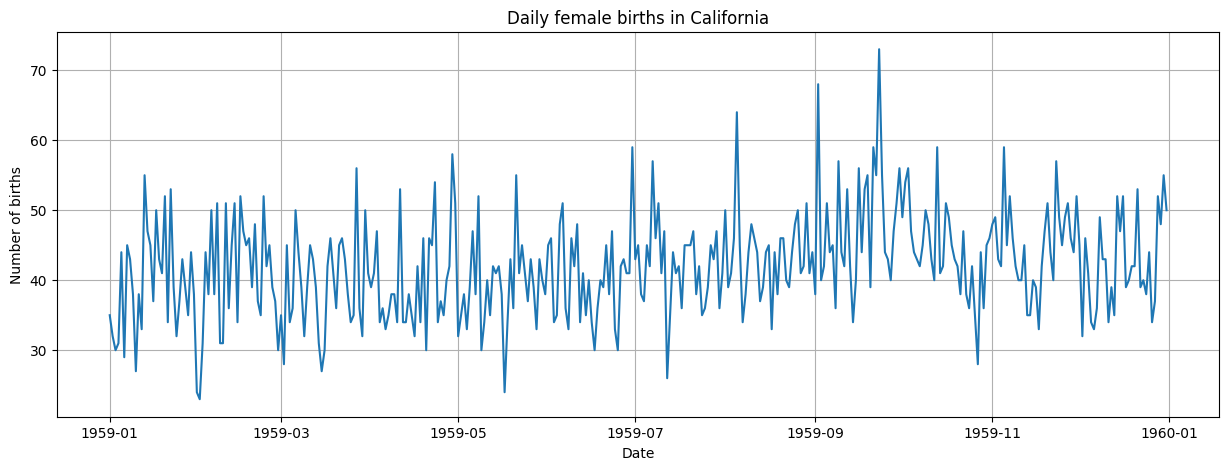

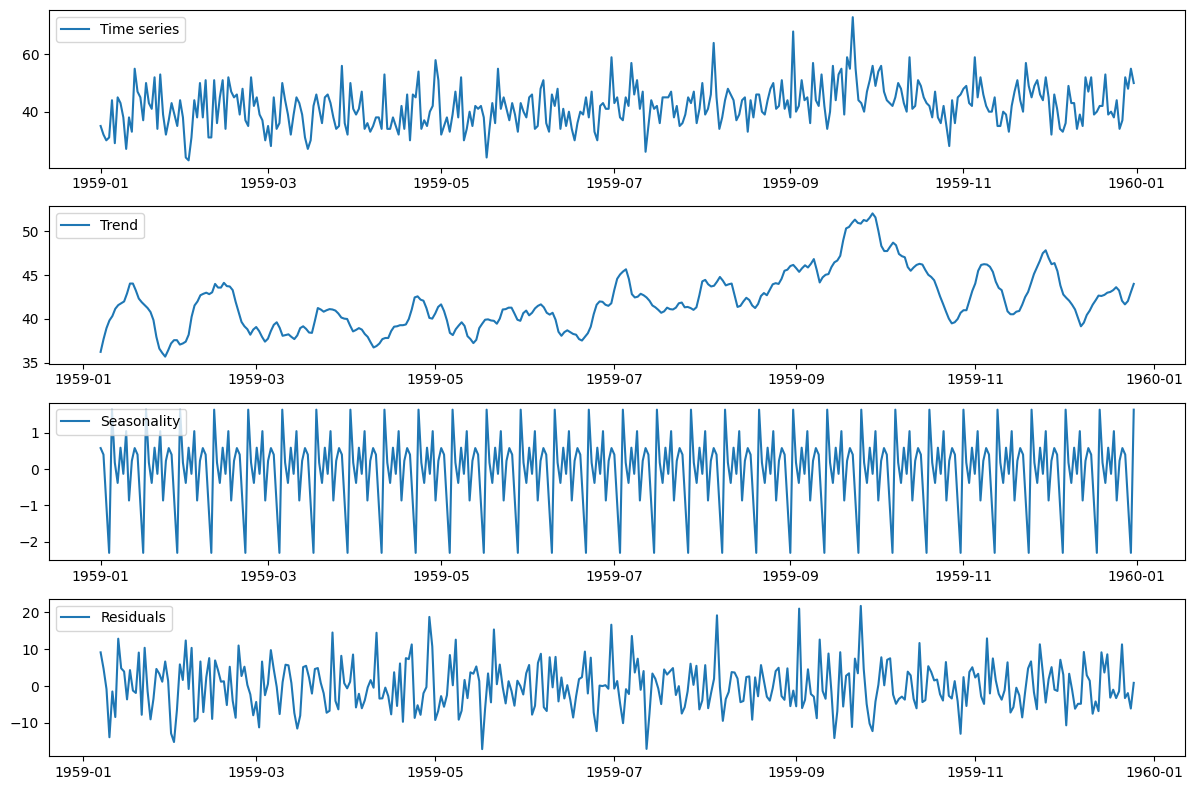


Mean squared error (MSE): 84.39
Mean absolute error (MAE): 7.28


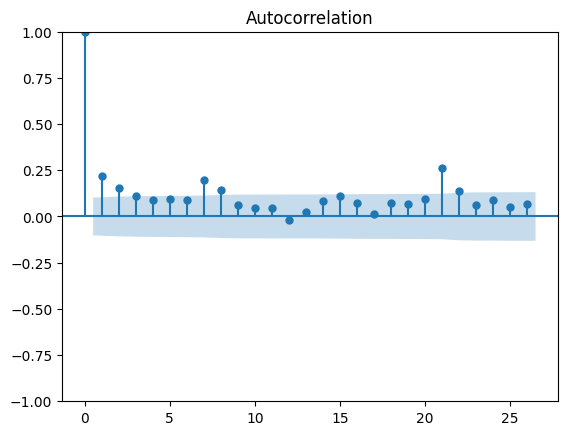

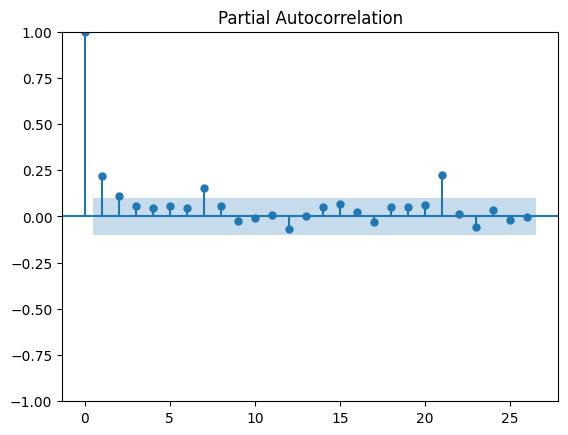

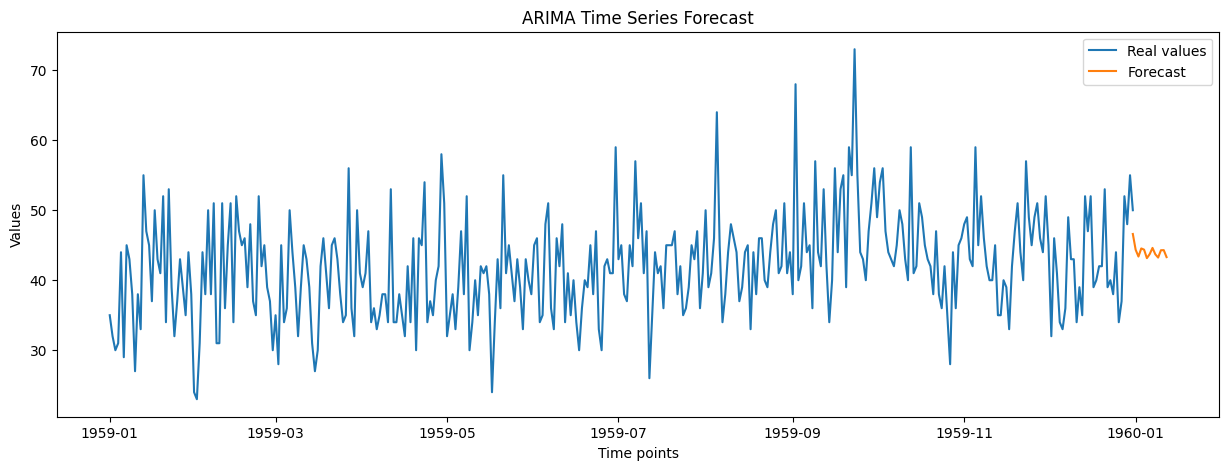

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

data = pd.read_csv('downloaded_data.csv', parse_dates=['Date'], index_col='Date')
data = data.asfreq('D') 

plt.figure(figsize=(15, 5))
plt.plot(data.index, data['Births'])
plt.grid()
plt.title('Daily female births in California')
plt.xlabel('Date')
plt.ylabel('Number of births')

series_value = data.values
value = pd.DataFrame(series_value)
df = pd.concat([value,value.shift(1)],axis=1)
df.columns = ['Abirth','Fbirth']

df_test = df[1:364]
df_test.to_csv('downloaded_data_test.csv', index=False)


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#Checking the stationarity of the time series
result = adfuller(data)
print("Augmented Dickey-Fuller test:")
print(f'* ADF Statistic: {result[0]:.2f}')
print(f'* p-value: {result[1]:.2f}')
print('\nCritical values:')
for key, value in result[4].items():
    print(f'* {key}: {value:.2f}')

#Decompose the time series into trend, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#Plot the decomposed components with months' names on y-axis
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data, label='Time series')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(df_test.Abirth, df_test.Fbirth)
mae = np.mean(np.abs(df_test.Abirth - df_test.Fbirth))
print(f"\nMean squared error (MSE): {mse:.2f}")
print(f"Mean absolute error (MAE): {mae:.2f}")


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Plot ACF and PACF
plot_acf(data)
plot_pacf(data)
plt.show()

p, d, q = 4, 1, 3  #ARIMA parameters
model = sm.tsa.ARIMA(data, order=(p, d, q))
results = model.fit()

forecast_steps = 13
forecasts = results.forecast(steps=forecast_steps)
plt.figure(figsize=(15, 5))
plt.plot(data, label='Real values')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps), forecasts, label='Forecast')

plt.title("ARIMA Time Series Forecast")
plt.xlabel('Time points')
plt.ylabel('Values')
plt.legend()
plt.show()

* Для початку знайдемо набір часових даних в Інтернеті (https://machinelearningmastery.com/time-series-datasets-for-machine-learning/ - Daily Female Births Dataset)
* Далі завантажимо їх і візуалізуємо за допомогою графіку. Розподілимо дані про кількість народжуваних на реальні дані (Abirth) і прогнозовані (Fbirth). Перевіримо стаціонарність часового ряду, розкладемо часовий ряд на тренд, сезонні та залишкові компоненти і візуалізуємо їх
* Оцінемо точноість даної моделі і побудумо функцію автокореляції (ACF) і функцію часткової автокореляції (PACF). Далі побудуємо та навчимо модель ARIMA і запишемо прогноз на майбутні значення. Візуалізуємо цей прогноз та реальні значення на графіку

#### Part 3

R^2 = 0.84


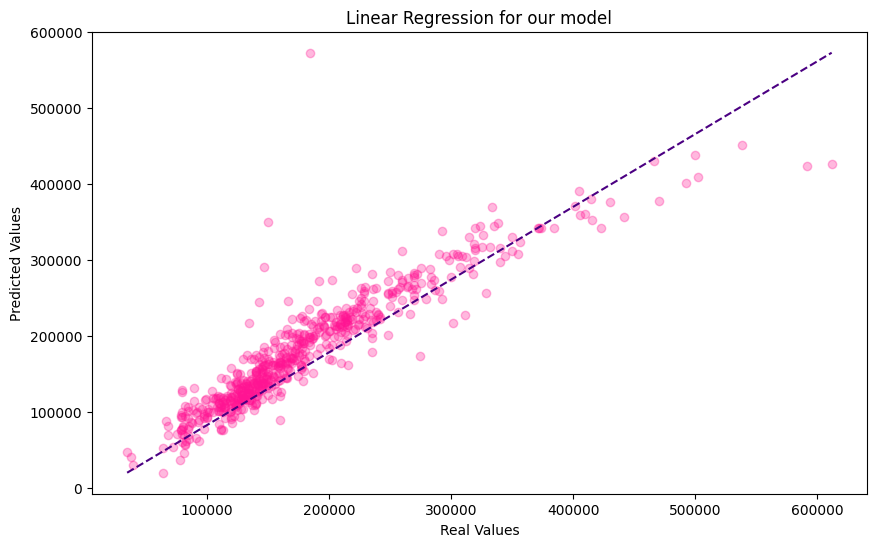

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('AmesHousing.csv')

X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

#Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

#Handling missing values filling them with the mean one
X.fillna(X.mean(), inplace=True)   

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#Scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print(f"R^2 = {r2:.2f}")


plt.figure(figsize=(10, 6))
plt.title("Linear Regression for our model")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.scatter(y_test, y_pred, c='deeppink', alpha=0.3)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], ls='--', c ='indigo')

plt.show()

* Спочатку завантажимо файл даних "AmesHousing.csv"
* Визначимо цільову змінну для регресії - ціну житла
* Застосуємо LabelEncoder до  категоріальних ознак, щоб з ними можна було працювати для зображення на графіку. Далі обробимо відсутні значення, заповнивши їх середніми значеннями кожної з ознак. Розділимо дані на тренувальний та тестовий набір і проведемо масштабування. У кінці побудуємо модель лінійної регресії на підготовлених даних і оцінимо її точність